- 참고: https://tinyurl.com/yxvf6emc
- XML 검출기:https://github.com/opencv/opencv/tree/master/data/haarcascades

### 정지 영상(이미지)에서 얼굴 탐색

In [83]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [84]:
src = cv2.imread('data/image1.jpg')
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)  
#  흑백 명암(그레이스케일)으로 이미지를 변환하여 찾음
# 이미지를 처리하는데에는 색깔이 필요없기 때문.

In [85]:
#얼굴과 눈 검출을 위한 haarcascade 파일 읽기, CascadeClassifier 객체 생성
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

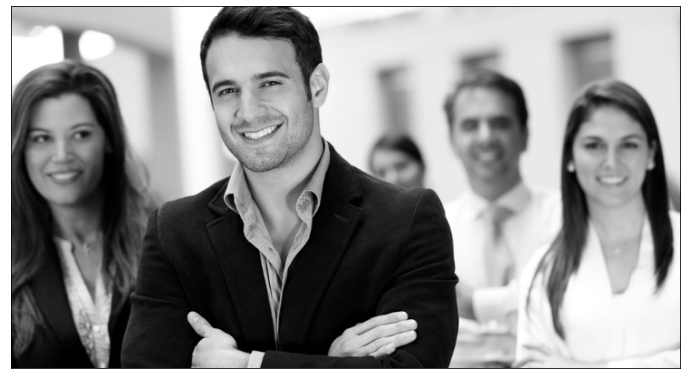

In [86]:
plt.figure(figsize=(12,8))
plt.imshow(src_gray, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


In [87]:
faces = face_cascade.detectMultiScale(src_gray, 1.1,5)
# face_cascade.detectMultiScale(입력 이미지, 미지 피라미드 스케일 factor, 인접 객체 최소 거리 픽셀)
# 참조: https://deep-eye.tistory.com/18
print(faces.shape)
print("Number of faces detected: " + str(faces.shape[0]))

(4, 4)
Number of faces detected: 4


In [88]:
faces

array([[192,  33, 145, 145],
       [478,  96,  91,  91],
       [ 12, 109,  96,  96],
       [612, 117, 100, 100]], dtype=int32)

<function matplotlib.pyplot.show(close=None, block=None)>

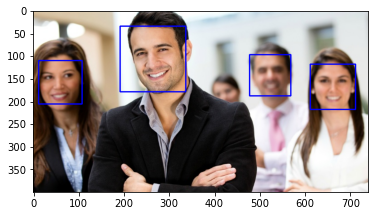

In [89]:
for x,y,w,h in faces:
    cv2.rectangle(src,(x,y),(x+w,y+h),(255,0,0),2)

cv2.imwrite('data/face_cascade.jpg',src)

b,g,r=cv2.split(src) #img파일을 b,g,r로 분리
src2=cv2.merge([r,g,b])   #b,r을 바꿔서 Merge
plt.imshow(src2)
plt.show

### 동영상에서 얼굴 탐색

In [90]:
import cv2
import timeit

# 영상 검출기
def videoDetector(cam,cascade):
    
    while True:
        
        start_t = timeit.default_timer()
        
        # 캡처 이미지 불러오기
        ret,img = cam.read()
        # 영상 압축
        img = cv2.resize(img,dsize=None,fx=1.0,fy=1.0)
        # 그레이 스케일 변환
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        # cascade 얼굴 탐지 알고리즘 
        results = cascade.detectMultiScale(gray,            # 입력 이미지
                                           scaleFactor= 1.5,# 이미지 피라미드 스케일 factor
                                           minNeighbors=5,  # 인접 객체 최소 거리 픽셀
                                           minSize=(20,20)  # 탐지 객체 최소 크기
                                           )
        # 결과값 = 탐지된 객체의 경계상자 list                                                                 
        for box in results:
            # 좌표 추출 
            x, y, w, h = box
            # 경계 상자 그리기
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,255,255), thickness=2)
     
        """ 알고리즘 연산 """ 
        # 알고리즘 종료 시점
        terminate_t = timeit.default_timer()
        FPS = 'fps' + str(int(2./(terminate_t - start_t )))
        cv2.putText(img,FPS,(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1)
        
        
         # 영상 출력        
        cv2.imshow('facenet',img)
        
        if cv2.waitKey(33) > 0: break
            
# 가중치 모델 불러오기
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# 영상 파일 
cam = cv2.VideoCapture('./data/backkpink.mp4')


# 영상 탐지기
videoDetector(cam,cascade)
cv2.destroyAllWindows()

### 웹캠을 이용한 얼굴 탐색

In [99]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) # 노트북 웹캠을 카메라로 사용
cap.set(3,720) # 너비
cap.set(4,840) # 높이

while(True):
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1) # 좌우 대칭
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #cvtColor: 색상 모드 변경하기/ COLOR_BGR2GRAY: gray색상이로 변경 

    faces = face_cascade.detectMultiScale(gray,1.05, 5)
    print("Number of faces detected: " + str(len(faces)))

    if len(faces):
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        
    cv2.imshow('result', frame)
    
    k = cv2.waitKey(30) & 0xff
    
    if k == 27: # Esc 키를 누르면 종료
        break

cap.release()
cv2.destroyAllWindows()

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1


In [98]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

cap = cv2.VideoCapture(0) # 노트북 웹캠을 카메라로 사용
cap.set(3,720) # 너비
cap.set(4,840) # 높이

while(True):
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1) # 좌우 대칭
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray,1.05, 5)
    print("Number of faces detected: " + str(len(faces)))

    if len(faces):
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        
    cv2.imshow('result', frame)
    
    k = cv2.waitKey(30) & 0xff
    
    if k == 27: # Esc 키를 누르면 종료
        break

cap.release()
cv2.destroyAllWindows()

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces dete

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces dete